In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Importar base de dados de treinamento

In [2]:
base = pd.read_csv('../../data/acoesPetrobras/base_treinamento.csv')

In [3]:
base = base.dropna()

In [4]:
base_treinamento = base.iloc[:,1:2].values
base_valor_maximo = base.iloc[:,2:3].values

#### Normalizar os dados

In [5]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

#### Formar base de dados de forma a utilizar os 90 registros anteriores para se prever o proximo valor

In [6]:
previsores = []
preco_real1 = []
preco_real2= []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i,0])
    preco_real1.append(base_treinamento_normalizada[i,0])
    preco_real2.append(base_valor_maximo_normalizada[i,0])
previsores, preco_real1, preco_real2 = np.array(previsores), np.array(preco_real1), np.array(preco_real2)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [7]:
preco_real = np.column_stack((preco_real1, preco_real2))

#### Estrutura da Rede Neural

In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 2, activation = 'linear'))
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])


#### Treinamento da rede neural recorrente

In [9]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32, verbose=1, use_multiprocessing=True)

Epoch 1/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0409 - mean_absolute_error: 0.1512
Epoch 2/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0202 - mean_absolute_error: 0.1108
Epoch 3/100
1152/1152 [==============================] - 13s 12ms/step - loss: 0.0156 - mean_absolute_error: 0.0969
Epoch 4/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0158 - mean_absolute_error: 0.0975
Epoch 5/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0134 - mean_absolute_error: 0.0889
Epoch 6/100
1152/1152 [==============================] - 13s 12ms/step - loss: 0.0110 - mean_absolute_error: 0.0813
Epoch 7/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0107 - mean_absolute_error: 0.0788
Epoch 8/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0103 - mean_absolute_error: 0.0767
Epoch 9/100
1152/1152 [==============================] - 13s 12ms/step -

1152/1152 [==============================] - 18s 16ms/step - loss: 0.0020 - mean_absolute_error: 0.0338
Epoch 72/100
1152/1152 [==============================] - 17s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0345
Epoch 73/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0329
Epoch 74/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0334
Epoch 75/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0335
Epoch 76/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0325
Epoch 77/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0340
Epoch 78/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0018 - mean_absolute_error: 0.0322
Epoch 79/100
1152/1152 [==============================] - 16s 14ms/step - los

#### Importar base de testes

In [10]:
base_teste = pd.read_csv('../../data/acoesPetrobras/base_teste.csv')

In [11]:
preco_real_teste = base_teste.iloc[:,1:2].values

In [12]:
preco_real_open = base_teste.iloc[:,1:2].values
preco_real_high = base_teste.iloc[:,2:3].values

In [13]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

In [14]:
x_teste = []
for i in range(90,112):
    x_teste.append(entradas[i-90:i,0])
x_teste = np.array(x_testeste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [15]:
previsoes = regressor.predict(x_testete)
previsoes = normalizador.inverse_transform(previsoes)

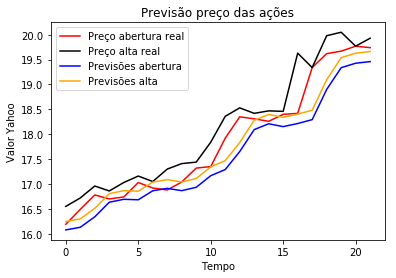

In [17]:
plt.plot(preco_real_open, color = 'red', label = 'Preço abertura real')
plt.plot(preco_real_high, color = 'black', label = 'Preço alta real')

plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsões abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsões alta')

plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()